In [2]:
import pandas as pd
import numpy as np
#import sys
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2
from sklearn.svm import SVC
#from sklearn.cluster import KMeans
#from scipy import signal
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
#from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import plot_confusion_matrix

#%matplotlib inline  
#%matplotlib notebook
#%pylab

In [3]:
# uncomment this if you want to see all the dataframe
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [4]:
# read all datasets

A549_TGF_RNAseq = pd.read_csv('A549_TGFB1.pseudobulk.txt',sep='\t',index_col=0)
A549_EGF_RNAseq = pd.read_csv('A549_EGF.pseudobulk.txt',sep='\t',index_col=0)
A549_TNF_RNAseq = pd.read_csv('A549_TNF.pseudobulk.txt',sep='\t',index_col=0)

DU145_TGF_RNAseq = pd.read_csv('DU145_TGFB1.pseudobulk.txt',sep='\t',index_col=0)
DU145_EGF_RNAseq = pd.read_csv('DU145_EGF.pseudobulk.txt',sep='\t',index_col=0)
DU145_TNF_RNAseq = pd.read_csv('DU145_TNF.pseudobulk.txt',sep='\t',index_col=0)

MCF7_TGF_RNAseq = pd.read_csv('MCF7_TGFB1.pseudobulk.txt',sep='\t',index_col=0)
MCF7_EGF_RNAseq = pd.read_csv('MCF7_EGF.pseudobulk.txt',sep='\t',index_col=0)
MCF7_TNF_RNAseq = pd.read_csv('MCF7_TNF.pseudobulk.txt',sep='\t',index_col=0)

OVCA420_TGF_RNAseq = pd.read_csv('OVCA420_TGFB1.pseudobulk.txt',sep='\t',index_col=0)
OVCA420_EGF_RNAseq = pd.read_csv('OVCA420_EGF.pseudobulk.txt',sep='\t',index_col=0)
OVCA420_TNF_RNAseq = pd.read_csv('OVCA420_TNF.pseudobulk.txt',sep='\t',index_col=0)

In [5]:
# normalizing the datasets
A549_TGF_RNAseq_norm_ = A549_TGF_RNAseq.subtract(A549_TGF_RNAseq['Uninhibited_Untreated'],axis=0)
A549_EGF_RNAseq_norm_ = A549_EGF_RNAseq.subtract(A549_EGF_RNAseq['Uninhibited_Untreated'],axis=0)
A549_TNF_RNAseq_norm_ = A549_TNF_RNAseq.subtract(A549_TNF_RNAseq['Uninhibited_Untreated'],axis=0)

DU145_TGF_RNAseq_norm_ = DU145_TGF_RNAseq.subtract(DU145_TGF_RNAseq['Uninhibited_Untreated'],axis=0)
DU145_EGF_RNAseq_norm_ = DU145_EGF_RNAseq.subtract(DU145_EGF_RNAseq['Uninhibited_Untreated'],axis=0)
DU145_TNF_RNAseq_norm_ = DU145_TNF_RNAseq.subtract(DU145_TNF_RNAseq['Uninhibited_Untreated'],axis=0)

MCF7_TGF_RNAseq_norm_ = MCF7_TGF_RNAseq.subtract(MCF7_TGF_RNAseq['Uninhibited_Untreated'],axis=0)
MCF7_EGF_RNAseq_norm_ = MCF7_EGF_RNAseq.subtract(MCF7_EGF_RNAseq['Uninhibited_Untreated'],axis=0)
MCF7_TNF_RNAseq_norm_ = MCF7_TNF_RNAseq.subtract(MCF7_TNF_RNAseq['Uninhibited_Untreated'],axis=0)

OVCA420_TGF_RNAseq_norm_ = OVCA420_TGF_RNAseq.subtract(OVCA420_TGF_RNAseq['Uninhibited_Untreated'],axis=0)
OVCA420_EGF_RNAseq_norm_ = OVCA420_EGF_RNAseq.subtract(OVCA420_EGF_RNAseq['Uninhibited_Untreated'],axis=0)
OVCA420_TNF_RNAseq_norm_ = OVCA420_TNF_RNAseq.subtract(OVCA420_TNF_RNAseq['Uninhibited_Untreated'],axis=0)

In [6]:
# taking intersection of genes
genes_list = list(set(A549_TGF_RNAseq_norm_.index) & set(A549_EGF_RNAseq_norm_.index) & set(A549_TNF_RNAseq_norm_.index) & set(DU145_TGF_RNAseq_norm_.index) & set(DU145_EGF_RNAseq_norm_.index) & set(DU145_TNF_RNAseq_norm_.index) & set(MCF7_TGF_RNAseq_norm_.index) & set(MCF7_EGF_RNAseq_norm_.index) & set(MCF7_TNF_RNAseq_norm_.index) & set(OVCA420_TGF_RNAseq_norm_.index) & set(OVCA420_EGF_RNAseq_norm_.index) & set(OVCA420_TNF_RNAseq_norm_.index))
print(len(genes_list))

A549_TGF_RNAseq_norm = A549_TGF_RNAseq_norm_.loc[genes_list].copy()
A549_EGF_RNAseq_norm = A549_EGF_RNAseq_norm_.loc[genes_list].copy()
A549_TNF_RNAseq_norm = A549_TNF_RNAseq_norm_.loc[genes_list].copy()

DU145_TGF_RNAseq_norm = DU145_TGF_RNAseq_norm_.loc[genes_list].copy()
DU145_EGF_RNAseq_norm = DU145_EGF_RNAseq_norm_.loc[genes_list].copy()
DU145_TNF_RNAseq_norm = DU145_TNF_RNAseq_norm_.loc[genes_list].copy()

MCF7_TGF_RNAseq_norm = MCF7_TGF_RNAseq_norm_.loc[genes_list].copy()
MCF7_EGF_RNAseq_norm = MCF7_EGF_RNAseq_norm_.loc[genes_list].copy()
MCF7_TNF_RNAseq_norm = MCF7_TNF_RNAseq_norm_.loc[genes_list].copy()

OVCA420_TGF_RNAseq_norm = OVCA420_TGF_RNAseq_norm_.loc[genes_list].copy()
OVCA420_EGF_RNAseq_norm = OVCA420_EGF_RNAseq_norm_.loc[genes_list].copy()
OVCA420_TNF_RNAseq_norm = OVCA420_TNF_RNAseq_norm_.loc[genes_list].copy()

11001


In [7]:
# read drugs legend
dr_legend = pd.read_excel('drugs_legend.xlsx',index_col=0)
dr_legend

,Target
Drug,
PKC 412,PKC
Doramapimod,p38
Erlotinib,EGFR
NVP-BEZ235,PI3K
Phthalazinone Pyrazole,Aurora-A
Torin 1,mTOR
BIBF 1120,VGFR/PDGFR/FGFR
CAY10657,IKK2
Ruxolitinib,JAK


In [8]:
# calculating STV
trainset_epi = pd.concat([A549_TGF_RNAseq_norm['Uninhibited_Untreated'],DU145_TGF_RNAseq_norm['Uninhibited_Untreated'],MCF7_TGF_RNAseq_norm['Uninhibited_Untreated'],OVCA420_TGF_RNAseq_norm['Uninhibited_Untreated']],axis=1)
trainset_mes = pd.concat([A549_TGF_RNAseq_norm['Uninhibited_TGFB1'],DU145_TGF_RNAseq_norm['Uninhibited_TGFB1'],MCF7_TGF_RNAseq_norm['Uninhibited_TGFB1'],OVCA420_TGF_RNAseq_norm['Uninhibited_TGFB1']],axis=1)
gene_trainset = pd.concat([trainset_epi,trainset_mes],axis=1)

cls = list(np.full(len(trainset_epi.columns),0)) + list(np.full(len(trainset_mes.columns),1))

svc = SVC(kernel='linear')
svc.fit(gene_trainset.transpose(),cls)
b_coeff = -svc.intercept_[0]/linalg.norm(svc.coef_[0])
norm_vec = svc.coef_[0]/linalg.norm(svc.coef_[0])

epi_cnt = trainset_epi.mean(axis=1)
mes_cnt = trainset_mes.mean(axis=1)
s_vec = (mes_cnt - epi_cnt)/linalg.norm(mes_cnt - epi_cnt)

norm_vec_df = pd.DataFrame(s_vec,index=gene_trainset.index,columns=['s_vec'])
norm_vec_df.insert(0,'norm_vec',norm_vec)
# plot STV ranking
#norm_vec_df.to_csv('Phospho_MS_STV.csv')
#norm_vec_df.sort_values(by='norm_vec')

angle = (np.arccos(np.dot(norm_vec,s_vec))/np.pi)*180
angle

45.2940758150843

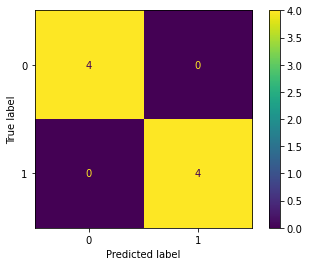

In [9]:
plot_confusion_matrix(svc,gene_trainset.transpose(),cls)
# clear separation

In [10]:
b_coeff_pd = pd.DataFrame([b_coeff],index=['general_STV'],columns=['b_coeff'])
b_coeff_pd.to_csv('EMT_b_coef_scRNAseq.csv')
norm_vec_df.to_csv('EMT_STV_scRNAseq.csv')
norm_vec_df.sort_values(by='norm_vec')

,norm_vec,s_vec
MT-CO3,-0.326168,-0.290044
MT-ND1,-0.271152,-0.171514
MT-ND4,-0.236682,-0.162433
S100A6,-0.188703,-0.062462
MT-CO2,-0.183367,-0.131180
...,...,...
PMEPA1,0.126083,0.076133
MT2A,0.175524,0.277830
TAGLN,0.186985,0.043985
TPM1,0.267325,0.124935


In [11]:
norm_vec_df.loc['VIM']

norm_vec    0.060317
s_vec       0.029084
Name: VIM, dtype: float64

In [12]:
# now we need to calculate DPDs
dr_legend['DPD_A549_TGFB']=np.nan
dr_legend['DPD_A549_EGF']=np.nan
dr_legend['DPD_A549_TNF']=np.nan

dr_legend['DPD_DU145_TGFB']=np.nan
dr_legend['DPD_DU145_EGF']=np.nan
dr_legend['DPD_DU145_TNF']=np.nan

dr_legend['DPD_MCF7_TGFB']=np.nan
dr_legend['DPD_MCF7_EGF']=np.nan
dr_legend['DPD_MCF7_TNF']=np.nan

dr_legend['DPD_OVCA420_TGFB']=np.nan
dr_legend['DPD_OVCA420_EGF']=np.nan
dr_legend['DPD_OVCA420_TNF']=np.nan

for drug in A549_TGF_RNAseq_norm.columns:
    dr_legend.at[drug,'DPD_A549_TGFB'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TGF_RNAseq_norm[drug]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
for drug in A549_EGF_RNAseq_norm.columns:
    dr_legend.at[drug,'DPD_A549_EGF'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_EGF_RNAseq_norm[drug]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
for drug in A549_TNF_RNAseq_norm.columns:
    dr_legend.at[drug,'DPD_A549_TNF'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TNF_RNAseq_norm[drug]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])

for drug in DU145_TGF_RNAseq_norm.columns:
    dr_legend.at[drug,'DPD_DU145_TGFB'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TGF_RNAseq_norm[drug]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
for drug in DU145_EGF_RNAseq_norm.columns:
    dr_legend.at[drug,'DPD_DU145_EGF'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_EGF_RNAseq_norm[drug]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
for drug in DU145_TNF_RNAseq_norm.columns:
    dr_legend.at[drug,'DPD_DU145_TNF'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TNF_RNAseq_norm[drug]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])

for drug in MCF7_TGF_RNAseq_norm.columns:
    dr_legend.at[drug,'DPD_MCF7_TGFB'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TGF_RNAseq_norm[drug]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
for drug in MCF7_EGF_RNAseq_norm.columns:
    dr_legend.at[drug,'DPD_MCF7_EGF'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_EGF_RNAseq_norm[drug]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
for drug in MCF7_TNF_RNAseq_norm.columns:
    dr_legend.at[drug,'DPD_MCF7_TNF'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],MCF7_TNF_RNAseq_norm[drug]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])

for drug in OVCA420_TGF_RNAseq_norm.columns:
    dr_legend.at[drug,'DPD_OVCA420_TGFB'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TGF_RNAseq_norm[drug]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
for drug in OVCA420_EGF_RNAseq_norm.columns:
    dr_legend.at[drug,'DPD_OVCA420_EGF'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_EGF_RNAseq_norm[drug]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
for drug in OVCA420_TNF_RNAseq_norm.columns:
    dr_legend.at[drug,'DPD_OVCA420_TNF'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],OVCA420_TNF_RNAseq_norm[drug]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])

dr_legend.to_csv('EMT_DPD_vals.csv')
dr_legend

,Target,DPD_A549_TGFB,DPD_A549_EGF,DPD_A549_TNF,DPD_DU145_TGFB,DPD_DU145_EGF,DPD_DU145_TNF,DPD_MCF7_TGFB,DPD_MCF7_EGF,DPD_MCF7_TNF,DPD_OVCA420_TGFB,DPD_OVCA420_EGF,DPD_OVCA420_TNF
Drug,,,,,,,,,,,,,
PKC 412,PKC,158.898992,-63.236005,NaN,248.003952,113.151088,167.296025,169.522672,134.624157,NaN,157.605093,NaN,79.476138
Doramapimod,p38,68.108219,-77.780755,-49.632073,73.441339,-17.129329,-18.764261,43.284170,-57.839543,27.102845,63.882754,-34.483482,-2.876961
Erlotinib,EGFR,70.120381,-46.832696,NaN,70.316228,-45.076485,-13.507663,56.472650,-52.866641,33.305967,115.305711,-48.928696,-0.029013
NVP-BEZ235,PI3K,NaN,299.837393,NaN,253.607110,297.062638,99.636489,NaN,146.325523,NaN,244.796475,284.698189,234.443893
Phthalazinone Pyrazole,Aurora-A,17.352456,-120.922577,NaN,-30.364111,-153.240896,-126.020292,NaN,132.215295,86.979107,78.132068,-34.751427,-35.134111
Torin 1,mTOR,254.677619,366.590108,NaN,280.230594,316.080876,106.701925,NaN,89.257290,NaN,272.855101,186.392308,145.503937
BIBF 1120,VGFR/PDGFR/FGFR,-61.316191,-85.235912,NaN,-21.479599,-102.058603,-60.493783,193.953383,-25.897697,74.023775,70.407122,-40.520556,-20.490179
CAY10657,IKK2,10.567460,105.916018,NaN,217.568395,NaN,-119.454024,NaN,128.799664,137.848186,72.049756,-26.984492,-22.806208
Ruxolitinib,JAK,49.928988,-93.405071,-23.756262,43.118535,-47.445134,-58.679966,65.109106,-50.201189,-24.314652,75.440407,-8.458208,-25.047833


In [13]:
# entring parameters for plots
drug_plot='PD 0325901'
gene_name='VIM'

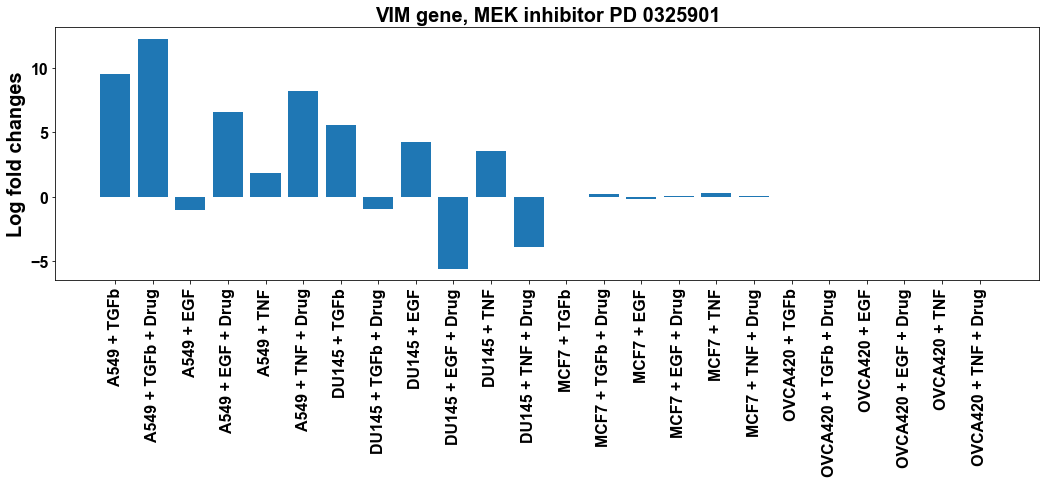

In [14]:
# make bar plot for all cells
names = ['A549 + TGFb','A549 + TGFb + Drug','A549 + EGF','A549 + EGF + Drug','A549 + TNF','A549 + TNF + Drug','DU145 + TGFb','DU145 + TGFb + Drug','DU145 + EGF','DU145 + EGF + Drug','DU145 + TNF','DU145 + TNF + Drug','MCF7 + TGFb','MCF7 + TGFb + Drug','MCF7 + EGF','MCF7 + EGF + Drug','MCF7 + TNF','MCF7 + TNF + Drug','OVCA420 + TGFb','OVCA420 + TGFb + Drug','OVCA420 + EGF','OVCA420 + EGF + Drug','OVCA420 + TNF','OVCA420 + TNF + Drug']

if drug_plot in A549_TGF_RNAseq_norm.columns:
    A549_TGF_gene_ctrl = A549_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    A549_TGF_gene_drug = A549_TGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    A549_TGF_gene_ctrl = A549_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    A549_TGF_gene_drug = 0

if drug_plot in A549_EGF_RNAseq_norm.columns:
    A549_EGF_gene_ctrl = A549_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    A549_EGF_gene_drug = A549_EGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    A549_EGF_gene_ctrl = A549_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    A549_EGF_gene_drug = 0

if drug_plot in A549_TNF_RNAseq_norm.columns:
    A549_TNF_gene_ctrl = A549_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    A549_TNF_gene_drug = A549_TNF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    A549_TNF_gene_ctrl = A549_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    A549_TNF_gene_drug = 0

if drug_plot in DU145_TGF_RNAseq_norm.columns:
    DU145_TGF_gene_ctrl = DU145_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    DU145_TGF_gene_drug = DU145_TGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    DU145_TGF_gene_ctrl = DU145_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    DU145_TGF_gene_drug = 0

if drug_plot in DU145_EGF_RNAseq_norm.columns:
    DU145_EGF_gene_ctrl = DU145_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    DU145_EGF_gene_drug = DU145_EGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    DU145_EGF_gene_ctrl = DU145_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    DU145_EGF_gene_drug = 0

if drug_plot in DU145_TNF_RNAseq_norm.columns:
    DU145_TNF_gene_ctrl = DU145_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    DU145_TNF_gene_drug = DU145_TNF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    DU145_TNF_gene_ctrl = DU145_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    DU145_TNF_gene_drug = 0

if drug_plot in MCF7_TGF_RNAseq_norm.columns:
    MCF7_TGF_gene_ctrl = MCF7_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    MCF7_TGF_gene_drug = MCF7_TGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    MCF7_TGF_gene_ctrl = MCF7_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    MCF7_TGF_gene_drug = 0

if drug_plot in MCF7_EGF_RNAseq_norm.columns:
    MCF7_EGF_gene_ctrl = MCF7_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    MCF7_EGF_gene_drug = MCF7_EGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    MCF7_EGF_gene_ctrl = MCF7_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    MCF7_EGF_gene_drug = 0

if drug_plot in MCF7_TNF_RNAseq_norm.columns:
    MCF7_TNF_gene_ctrl = MCF7_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    MCF7_TNF_gene_drug = MCF7_TNF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    MCF7_TNF_gene_ctrl = MCF7_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    MCF7_TNF_gene_drug = 0

if drug_plot in OVCA420_TGF_RNAseq_norm.columns:
    OVCA420_TGF_gene_ctrl = OVCA420_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    OVCA420_TGF_gene_drug = OVCA420_TGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    OVCA420_TGF_gene_ctrl = OVCA420_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    OVCA420_TGF_gene_drug = 0

if drug_plot in OVCA420_EGF_RNAseq_norm.columns:
    OVCA420_EGF_gene_ctrl = OVCA420_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    OVCA420_EGF_gene_drug = OVCA420_EGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    OVCA420_EGF_gene_ctrl = OVCA420_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    OVCA420_EGF_gene_drug = 0

if drug_plot in OVCA420_TNF_RNAseq_norm.columns:
    OVCA420_TNF_gene_ctrl = OVCA420_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    OVCA420_TNF_gene_drug = OVCA420_TNF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    OVCA420_TNF_gene_ctrl = OVCA420_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    OVCA420_TNF_gene_drug = 0


values = [A549_TGF_gene_ctrl,A549_TGF_gene_drug,A549_EGF_gene_ctrl,A549_EGF_gene_drug,A549_TNF_gene_ctrl,A549_TNF_gene_drug,DU145_TGF_gene_ctrl,DU145_TGF_gene_drug,DU145_EGF_gene_ctrl,DU145_EGF_gene_drug,DU145_TNF_gene_ctrl,DU145_TNF_gene_drug,MCF7_TGF_gene_ctrl,MCF7_TGF_gene_drug,MCF7_EGF_gene_ctrl,MCF7_EGF_gene_drug,MCF7_TNF_gene_ctrl,MCF7_TNF_gene_drug,OVCA420_TGF_gene_ctrl,OVCA420_TGF_gene_drug,OVCA420_EGF_gene_ctrl,OVCA420_EGF_gene_drug,OVCA420_TNF_gene_ctrl,OVCA420_TNF_gene_drug,]

fig = plt.figure(figsize=(15,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title(gene_name + ' gene, ' + dr_legend.loc[drug_plot,'Target'] + ' inhibitor ' + drug_plot,**fontTitle)
plt.ylabel('Log fold changes',**fontLabel)
plt.bar(names,values)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

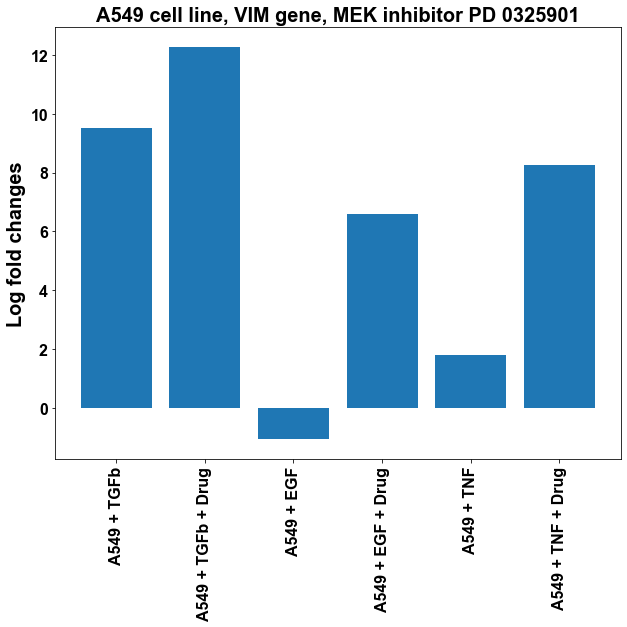

In [15]:
# make bar plot for A549
names = ['A549 + TGFb','A549 + TGFb + Drug','A549 + EGF','A549 + EGF + Drug','A549 + TNF','A549 + TNF + Drug']
if drug_plot in A549_TGF_RNAseq_norm.columns:
    A549_TGF_gene_ctrl = A549_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    A549_TGF_gene_drug = A549_TGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    A549_TGF_gene_ctrl = A549_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    A549_TGF_gene_drug = 0

if drug_plot in A549_EGF_RNAseq_norm.columns:
    A549_EGF_gene_ctrl = A549_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    A549_EGF_gene_drug = A549_EGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    A549_EGF_gene_ctrl = A549_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    A549_EGF_gene_drug = 0

if drug_plot in A549_TNF_RNAseq_norm.columns:
    A549_TNF_gene_ctrl = A549_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    A549_TNF_gene_drug = A549_TNF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    A549_TNF_gene_ctrl = A549_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    A549_TNF_gene_drug = 0

values = [A549_TGF_gene_ctrl,A549_TGF_gene_drug,A549_EGF_gene_ctrl,A549_EGF_gene_drug,A549_TNF_gene_ctrl,A549_TNF_gene_drug]

fig = plt.figure(figsize=(9,9))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title('A549 cell line, ' + gene_name + ' gene, ' + dr_legend.loc[drug_plot,'Target'] + ' inhibitor ' + drug_plot,**fontTitle)
plt.ylabel('Log fold changes',**fontLabel)
plt.bar(names,values)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

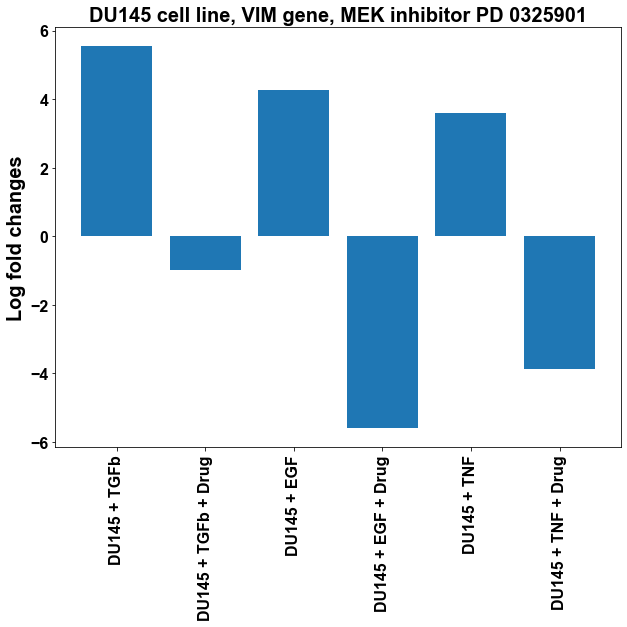

In [16]:
# make bar plot for DU145
names = ['DU145 + TGFb','DU145 + TGFb + Drug','DU145 + EGF','DU145 + EGF + Drug','DU145 + TNF','DU145 + TNF + Drug']
if drug_plot in DU145_TGF_RNAseq_norm.columns:
    DU145_TGF_gene_ctrl = DU145_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    DU145_TGF_gene_drug = DU145_TGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    DU145_TGF_gene_ctrl = DU145_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    DU145_TGF_gene_drug = 0

if drug_plot in DU145_EGF_RNAseq_norm.columns:
    DU145_EGF_gene_ctrl = DU145_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    DU145_EGF_gene_drug = DU145_EGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    DU145_EGF_gene_ctrl = DU145_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    DU145_EGF_gene_drug = 0

if drug_plot in DU145_TNF_RNAseq_norm.columns:
    DU145_TNF_gene_ctrl = DU145_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    DU145_TNF_gene_drug = DU145_TNF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    DU145_TNF_gene_ctrl = DU145_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    DU145_TNF_gene_drug = 0

values = [DU145_TGF_gene_ctrl,DU145_TGF_gene_drug,DU145_EGF_gene_ctrl,DU145_EGF_gene_drug,DU145_TNF_gene_ctrl,DU145_TNF_gene_drug]

fig = plt.figure(figsize=(9,9))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title('DU145 cell line, ' + gene_name + ' gene, ' + dr_legend.loc[drug_plot,'Target'] + ' inhibitor ' + drug_plot,**fontTitle)
plt.ylabel('Log fold changes',**fontLabel)
plt.bar(names,values)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

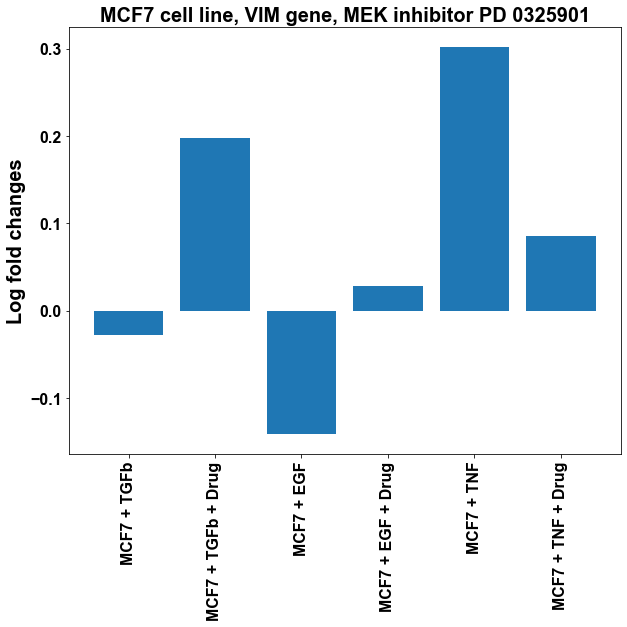

In [17]:
# make bar plot for MCF7
names = ['MCF7 + TGFb','MCF7 + TGFb + Drug','MCF7 + EGF','MCF7 + EGF + Drug','MCF7 + TNF','MCF7 + TNF + Drug']
if drug_plot in MCF7_TGF_RNAseq_norm.columns:
    MCF7_TGF_gene_ctrl = MCF7_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    MCF7_TGF_gene_drug = MCF7_TGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    MCF7_TGF_gene_ctrl = MCF7_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    MCF7_TGF_gene_drug = 0

if drug_plot in MCF7_EGF_RNAseq_norm.columns:
    MCF7_EGF_gene_ctrl = MCF7_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    MCF7_EGF_gene_drug = MCF7_EGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    MCF7_EGF_gene_ctrl = MCF7_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    MCF7_EGF_gene_drug = 0

if drug_plot in MCF7_TNF_RNAseq_norm.columns:
    MCF7_TNF_gene_ctrl = MCF7_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    MCF7_TNF_gene_drug = MCF7_TNF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    MCF7_TNF_gene_ctrl = MCF7_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    MCF7_TNF_gene_drug = 0

values = [MCF7_TGF_gene_ctrl,MCF7_TGF_gene_drug,MCF7_EGF_gene_ctrl,MCF7_EGF_gene_drug,MCF7_TNF_gene_ctrl,MCF7_TNF_gene_drug]

fig = plt.figure(figsize=(9,9))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title('MCF7 cell line, ' + gene_name + ' gene, ' + dr_legend.loc[drug_plot,'Target'] + ' inhibitor ' + drug_plot,**fontTitle)
plt.ylabel('Log fold changes',**fontLabel)
plt.bar(names,values)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

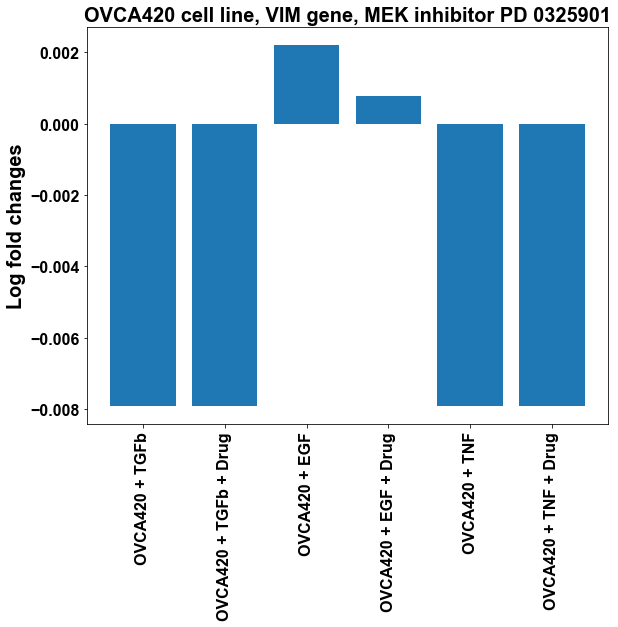

In [18]:
# make bar plot for OVCA420
names = ['OVCA420 + TGFb','OVCA420 + TGFb + Drug','OVCA420 + EGF','OVCA420 + EGF + Drug','OVCA420 + TNF','OVCA420 + TNF + Drug']
if drug_plot in OVCA420_TGF_RNAseq_norm.columns:
    OVCA420_TGF_gene_ctrl = OVCA420_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    OVCA420_TGF_gene_drug = OVCA420_TGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    OVCA420_TGF_gene_ctrl = OVCA420_TGF_RNAseq_norm.loc[gene_name,'Uninhibited_TGFB1']
    OVCA420_TGF_gene_drug = 0

if drug_plot in OVCA420_EGF_RNAseq_norm.columns:
    OVCA420_EGF_gene_ctrl = OVCA420_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    OVCA420_EGF_gene_drug = OVCA420_EGF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    OVCA420_EGF_gene_ctrl = OVCA420_EGF_RNAseq_norm.loc[gene_name,'Uninhibited_EGF']
    OVCA420_EGF_gene_drug = 0

if drug_plot in OVCA420_TNF_RNAseq_norm.columns:
    OVCA420_TNF_gene_ctrl = OVCA420_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    OVCA420_TNF_gene_drug = OVCA420_TNF_RNAseq_norm.loc[gene_name,drug_plot]
else:
    OVCA420_TNF_gene_ctrl = OVCA420_TNF_RNAseq_norm.loc[gene_name,'Uninhibited_TNF']
    OVCA420_TNF_gene_drug = 0

values = [OVCA420_TGF_gene_ctrl,OVCA420_TGF_gene_drug,OVCA420_EGF_gene_ctrl,OVCA420_EGF_gene_drug,OVCA420_TNF_gene_ctrl,OVCA420_TNF_gene_drug]

fig = plt.figure(figsize=(9,9))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title('OVCA420 cell line, ' + gene_name + ' gene, ' + dr_legend.loc[drug_plot,'Target'] + ' inhibitor ' + drug_plot,**fontTitle)
plt.ylabel('Log fold changes',**fontLabel)
plt.bar(names,values)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

In [19]:
KEA_df = pd.read_excel('kinase_screen_signatures.xlsx',index_col=0)
KEA_df

,Target,transcr_targets
Drug,,
LY364947,TGFBR1,"CDH1,TGFB1I1,PPP1CA,WWP2,EGR1,STAT1,OTUB1,SP1,..."
Erlotinib,EGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
Gefitinib,EGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
BIBF 1120,VGFR/PDGFR/FGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
PD 0325901,MEK/ERK,"NFIC,JAK1,GSK3B,STUB1,JUND,TUBB,TGFB1I1,NFATC1..."
NVP-BEZ235,PI3K/mTOR,"FOXO3,RARA,GADD45A,KDM5A,RPS3,PPP2R1A,EGR1,GSK..."
Torin 1,PI3K/mTOR,"FOXO3,RARA,GADD45A,KDM5A,RPS3,PPP2R1A,EGR1,GSK..."
PKC 412,PKC,"ELF3,HNRNPD,AURKA,PA2G4,RB1,GADD45A,KDM1A,FBXW..."
Doramapimod,p38,"SVIL,AURKA,STAG1,GSK3B,YY1,USP37,JUND,FOXM1,TU..."


In [20]:
# just trying to see some activity descriptor
drug_test = 'SP 600125'

genes = KEA_df.loc[drug_test,'transcr_targets'].split(',')
R_vals = pd.DataFrame(np.zeros((len(genes),1*3+1)),columns=['A549_TGFB','A549_EGF','A549_TNF','signs'],index=genes)

for gene in R_vals.index:
    signs = []
    
    x0=A549_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
    if drug_test in A549_TGF_RNAseq_norm.columns:
        x1=A549_TGF_RNAseq_norm.loc[gene,drug_test]
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_vals.at[gene,'A549_TGFB'] = R_global
        if R_global >= 0:
            signs.append(1)
        else:
            signs.append(-1)
    else:
        R_vals.at[gene,'A549_TGFB'] = np.nan
        signs.append(np.nan)
    x0=A549_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
    if drug_test in A549_EGF_RNAseq_norm.columns:
        x1=A549_EGF_RNAseq_norm.loc[gene,drug_test]
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_vals.at[gene,'A549_EGF'] = R_global
        if R_global >= 0:
            signs.append(1)
        else:
            signs.append(-1)
    else:
        R_vals.at[gene,'A549_EGF'] = np.nan
        signs.append(np.nan)
    x0=A549_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
    if drug_test in A549_TNF_RNAseq_norm.columns:
        x1=A549_TNF_RNAseq_norm.loc[gene,drug_test]
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_vals.at[gene,'A549_TNF'] = R_global
        if R_global >= 0:
            signs.append(1)
        else:
            signs.append(-1)
    else:
        R_vals.at[gene,'A549_TNF'] = np.nan
        signs.append(np.nan)
    
    R_vals.at[gene,'signs'] = np.nanmean(signs)
    
#R_vals = R_vals.fillna(0)
R_vals_filter = R_vals.loc[np.abs(R_vals['signs']) >= 0.95].copy()
# the required signature is in R_vals_filter['signs']

R_vals_filter

,A549_TGFB,A549_EGF,A549_TNF,signs
RARA,-1.443033,-0.849777,-1.087042,-1.0
SIRT6,-1.486294,-0.980138,-0.089978,-1.0
JUND,-0.386564,-0.265628,-1.225666,-1.0
STAT1,-0.294162,-0.060216,-0.948619,-1.0
SP1,-0.798068,-0.135638,-1.946988,-1.0
JUNB,0.141323,0.118580,0.663854,1.0
CDKN1A,0.586354,0.920914,1.435747,1.0
HMGA1,-0.383116,-1.276540,-1.270495,-1.0
IER3,-0.456972,-0.492434,-0.489336,-1.0
SUZ12,-1.341776,-1.181791,-0.699843,-1.0


In [21]:
Rs = []
for cond in R_vals_filter.columns[:-1]:
    gene_sign_R = []
    for gene_name_sign in R_vals_filter.index:
        if R_vals_filter.loc[gene_name_sign,'signs'] < 0:
            gene_sign_R.append(R_vals_filter.loc[gene_name_sign,cond])
        else:
            gene_sign_R.append(-R_vals_filter.loc[gene_name_sign,cond])
    #print(gene_sign_R)
    Rs.append(np.nanmean(gene_sign_R))

Rs_df = pd.DataFrame(Rs,columns=['R_values'],index=list(R_vals_filter.columns[:-1]))
Rs_df


,R_values
A549_TGFB,-0.669661
A549_EGF,-0.817540
A549_TNF,-0.909058


In [22]:
# preparing modules and perturbation lists
perturbations = list(KEA_df.index)

modules = []
for pert in perturbations:
    if len(modules) > 0:
        if KEA_df.loc[pert,'Target'] != modules[-1]:
            modules.append(KEA_df.loc[pert,'Target'])
    else: 
        modules.append(KEA_df.loc[pert,'Target'])
modules.append('DPD')
print("Our modules are: " + ", ".join(modules) + ". " + str(len(modules)) + " in total.")
print('\n')
print("Applied perturbations are: " + ", ".join(perturbations) + ". " + str(len(perturbations)) + " in total.")


Our modules are: TGFBR1, EGFR, VGFR/PDGFR/FGFR, MEK/ERK, PI3K/mTOR, PKC, p38, JNK, Aurora-A, RIPK1, IKK2, JAK, GSK3B, DPD. 14 in total.


Applied perturbations are: LY364947, Erlotinib, Gefitinib, BIBF 1120, PD 0325901, NVP-BEZ235, Torin 1, PKC 412, Doramapimod, SP 600125, Phthalazinone Pyrazole, Necrostatin-5, CAY10657, Ruxolitinib, CHIR99021. 15 in total.


In [23]:
# filling R matrices for A549 cells
R_A549_TGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_A549_EGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_A549_TNF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)

# filling signalling part
for module in modules[:-1]:
    # obtaining activity descriptor
    drug = KEA_df.loc[KEA_df['Target'] == module].index[0]
    genes = KEA_df.loc[drug,'transcr_targets'].split(',')
    R_vals = pd.DataFrame(np.zeros((len(genes),1*3+1)),columns=['A549_TGFB','A549_EGF','A549_TNF','signs'],index=genes)
    for gene in R_vals.index:
        signs = []
        x0=A549_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
        if drug in A549_TGF_RNAseq_norm.columns:
            x1=A549_TGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'A549_TGFB'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'A549_TGFB'] = np.nan
            signs.append(np.nan)
        x0=A549_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
        if drug in A549_EGF_RNAseq_norm.columns:
            x1=A549_EGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'A549_EGF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'A549_EGF'] = np.nan
            signs.append(np.nan)
        x0=A549_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
        if drug in A549_TNF_RNAseq_norm.columns:
            x1=A549_TNF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'A549_TNF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'A549_TNF'] = np.nan
            signs.append(np.nan)
        R_vals.at[gene,'signs'] = np.nanmean(signs)
    R_vals_filter = R_vals.loc[np.abs(R_vals['signs']) >= 0.9].copy()
    # now R_vals_filter has activity descriptor for the module
    # calculating R for the specific module
    for pert in perturbations:
        # TGFb
        if pert in A549_TGF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=A549_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
                x1=A549_TGF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_A549_TGF.at[module,pert] = np.nanmean(Rs_TGF)
        else:
            R_A549_TGF.at[module,pert] = np.nan
        # EGF
        if pert=='Erlotinib':
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_EGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=A549_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
                x1=A549_EGF_RNAseq_norm.loc[gene,'Uninhibited_Untreated']
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_EGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_A549_EGF.at[module,pert] = np.nanmean(Rs_EGF)
        else:    
            if pert in A549_EGF_RNAseq_norm.columns:
                # here we must run through all the genes in the signature and fill R arrays, taking into account signs
                Rs_EGF = []
                for gene in R_vals_filter.index:
                    # filling R values once again, now taking into account signs
                    x0=A549_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
                    x1=A549_EGF_RNAseq_norm.loc[gene,pert]
                    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                    Rs_EGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
                R_A549_EGF.at[module,pert] = np.nanmean(Rs_EGF)
            else:
                R_A549_EGF.at[module,pert] = np.nan
        # TNF
        if pert in A549_TNF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TNF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=A549_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
                x1=A549_TNF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TNF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_A549_TNF.at[module,pert] = np.nanmean(Rs_TNF)
        else:
            R_A549_TNF.at[module,pert] = np.nan

# filling DPD
for pert in perturbations:
    # TGFb
    x0 = dr_legend.loc['Uninhibited_TGFB1','DPD_A549_TGFB']
    x1 = dr_legend.loc[pert,'DPD_A549_TGFB']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_A549_TGF.at['DPD',pert] = R_global
    # EGF
    if pert=='Erlotinib':
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_A549_EGF']
        x1 = dr_legend.loc['Uninhibited_Untreated','DPD_A549_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_A549_EGF.at['DPD',pert] = R_global
    else:
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_A549_EGF']
        x1 = dr_legend.loc[pert,'DPD_A549_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_A549_EGF.at['DPD',pert] = R_global
    # TNF
    x0 = dr_legend.loc['Uninhibited_TNF','DPD_A549_TNF']
    x1 = dr_legend.loc[pert,'DPD_A549_TNF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_A549_TNF.at['DPD',pert] = R_global

R_A549_EGF.drop('Gefitinib', axis=1, inplace=True)
R_A549_EGF.rename(columns={'Erlotinib': 'EGF'}, inplace=True)

R_A549_TGF.to_csv('R_A549_TGFb.csv')
R_A549_EGF.to_csv('R_A549_EGF.csv')
R_A549_TNF.to_csv('R_A549_TNF.csv')
R_A549_EGF

,LY364947,EGF,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
TGFBR1,-0.620479,0.666667,-0.393620,-0.101066,0.366418,0.994921,-0.045835,0.001799,-0.219750,0.255990,-0.194563,-0.020843,-0.232574,-0.264668
EGFR,-0.708942,-0.777778,-0.493040,-0.679143,-0.095362,-0.333578,-0.671393,-0.020063,-0.277246,-0.290360,-0.115789,-0.375309,-0.347593,-0.387872
VGFR/PDGFR/FGFR,-0.404225,-0.142857,-0.473740,0.042358,0.245541,0.072655,-0.045759,0.177227,0.024386,-0.301360,0.570152,-0.130666,-0.066004,-0.453492
MEK/ERK,-0.214415,0.000000,-0.020898,-0.966062,-0.382695,-0.114815,-0.417942,-0.116197,-0.212726,-0.291525,-0.157557,-0.340203,-0.176298,-0.343540
PI3K/mTOR,-0.323211,-0.081967,-0.135288,-0.428991,-0.924803,-0.198796,-0.200628,-0.028118,-0.346683,-0.086381,0.026565,-0.392940,-0.050924,-0.217582
PKC,-0.386116,-0.173913,-0.045263,-0.469415,-0.443201,-0.132593,-1.011102,0.095177,-0.127046,-0.262301,0.014289,-0.371379,0.059066,-0.326256
p38,-0.174976,0.000000,-0.073798,-0.179968,-0.079304,0.049518,-0.002309,-0.580950,-0.183965,-0.149012,0.144083,-0.344024,-0.209292,-0.307060
JNK,-0.501160,-0.066667,0.286755,-0.422874,-0.256442,-0.120496,0.150988,-0.195188,-0.817540,-0.287072,-0.391734,-0.176304,-0.169603,-0.223112
Aurora-A,0.030212,0.000000,0.761452,-0.093229,0.342104,0.758665,-0.488063,-0.517807,-0.076083,-0.738058,0.615642,0.067061,0.314830,-0.243298
RIPK1,0.562249,0.000000,0.074681,0.531051,-0.603807,0.556087,-0.117825,0.502377,0.728553,0.077345,-0.709218,-0.192419,0.716381,0.678032


In [24]:
# filling R matrices for DU145 cells
R_DU145_TGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_DU145_EGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_DU145_TNF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)

# filling signalling part
for module in modules[:-1]:
    # obtaining activity descriptor
    drug = KEA_df.loc[KEA_df['Target'] == module].index[0]
    genes = KEA_df.loc[drug,'transcr_targets'].split(',')
    R_vals = pd.DataFrame(np.zeros((len(genes),1*3+1)),columns=['DU145_TGFB','DU145_EGF','DU145_TNF','signs'],index=genes)
    for gene in R_vals.index:
        signs = []
        x0=DU145_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
        if drug in DU145_TGF_RNAseq_norm.columns:
            x1=DU145_TGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'DU145_TGFB'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'DU145_TGFB'] = np.nan
            signs.append(np.nan)
        x0=DU145_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
        if drug in DU145_EGF_RNAseq_norm.columns:
            x1=DU145_EGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'DU145_EGF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'DU145_EGF'] = np.nan
            signs.append(np.nan)
        x0=DU145_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
        if drug in DU145_TNF_RNAseq_norm.columns:
            x1=DU145_TNF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'DU145_TNF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'DU145_TNF'] = np.nan
            signs.append(np.nan)
        R_vals.at[gene,'signs'] = np.nanmean(signs)
    R_vals_filter = R_vals.loc[np.abs(R_vals['signs']) >= 0.9].copy()
    # now R_vals_filter has activity descriptor for the module
    # calculating R for the specific module
    for pert in perturbations:
        # TGFb
        if pert in DU145_TGF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=DU145_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
                x1=DU145_TGF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_DU145_TGF.at[module,pert] = np.nanmean(Rs_TGF)
        else:
            R_DU145_TGF.at[module,pert] = np.nan
        # EGF
        if pert=='Erlotinib':
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_EGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=DU145_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
                x1=DU145_EGF_RNAseq_norm.loc[gene,'Uninhibited_Untreated']
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_EGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_DU145_EGF.at[module,pert] = np.nanmean(Rs_EGF)
        else:    
            if pert in DU145_EGF_RNAseq_norm.columns:
                # here we must run through all the genes in the signature and fill R arrays, taking into account signs
                Rs_EGF = []
                for gene in R_vals_filter.index:
                    # filling R values once again, now taking into account signs
                    x0=DU145_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
                    x1=DU145_EGF_RNAseq_norm.loc[gene,pert]
                    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                    Rs_EGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
                R_DU145_EGF.at[module,pert] = np.nanmean(Rs_EGF)
            else:
                R_DU145_EGF.at[module,pert] = np.nan
        # TNF
        if pert in DU145_TNF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TNF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=DU145_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
                x1=DU145_TNF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TNF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_DU145_TNF.at[module,pert] = np.nanmean(Rs_TNF)
        else:
            R_DU145_TNF.at[module,pert] = np.nan

# fillfing DPD
for pert in perturbations:
    # TGFb
    x0 = dr_legend.loc['Uninhibited_TGFB1','DPD_DU145_TGFB']
    x1 = dr_legend.loc[pert,'DPD_DU145_TGFB']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_DU145_TGF.at['DPD',pert] = R_global
    # EGF
    if pert=='Erlotinib':
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_DU145_EGF']
        x1 = dr_legend.loc['Uninhibited_Untreated','DPD_DU145_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_DU145_EGF.at['DPD',pert] = R_global
    else:
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_DU145_EGF']
        x1 = dr_legend.loc[pert,'DPD_DU145_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_DU145_EGF.at['DPD',pert] = R_global
    # TNF
    x0 = dr_legend.loc['Uninhibited_TNF','DPD_DU145_TNF']
    x1 = dr_legend.loc[pert,'DPD_DU145_TNF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_DU145_TNF.at['DPD',pert] = R_global

R_DU145_EGF.drop('Gefitinib', axis=1, inplace=True)
R_DU145_EGF.rename(columns={'Erlotinib': 'EGF'}, inplace=True)

R_DU145_TGF.to_csv('R_DU145_TGFb.csv')
R_DU145_EGF.to_csv('R_DU145_EGF.csv')
R_DU145_TNF.to_csv('R_DU145_TNF.csv')
R_DU145_EGF

,LY364947,EGF,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
TGFBR1,-0.779445,0.333333,-0.096957,0.556387,0.591375,0.528092,-0.212749,-0.059937,-0.120403,-0.081282,-0.386887,NaN,0.282255,-0.157800
EGFR,-0.413970,-0.500000,-0.470859,-0.701873,-0.210439,-0.530485,-0.758939,-0.061892,-0.267814,-0.140726,-0.521883,NaN,-0.189721,-0.280963
VGFR/PDGFR/FGFR,-0.299532,-0.454545,-0.836295,-0.773651,0.028983,-0.167233,-0.334807,-0.224989,-0.163380,-0.229479,-0.535828,NaN,-0.136997,-0.236356
MEK/ERK,-0.271965,-0.377049,-0.321458,-1.075915,-0.417970,-0.309892,-0.561126,-0.074115,-0.145901,-0.100302,-0.015102,NaN,-0.152071,-0.176276
PI3K/mTOR,0.127626,0.371429,0.000224,0.163591,-0.921974,-0.339538,-0.298324,0.183604,0.267756,0.231306,-0.098879,NaN,-0.091063,0.340086
PKC,-0.266430,-0.285714,-0.112306,-0.308208,-0.451549,-0.614378,-1.098710,-0.109824,-0.088983,0.026602,-0.432187,NaN,-0.282876,-0.156524
p38,-0.416713,-0.238095,-0.307813,-0.023418,0.137177,0.016537,0.324513,-0.830916,-0.421856,-0.284493,-0.267697,NaN,-0.254329,-0.242929
JNK,-0.557359,0.000000,-0.370766,0.021332,0.060221,-0.258065,0.259079,-0.453379,-0.805659,-0.121606,-0.220316,NaN,-0.154911,0.044969
Aurora-A,-0.244768,0.000000,-0.443106,0.149206,-0.100794,0.471689,0.711675,-0.111346,0.503144,-0.826033,0.221763,NaN,0.450638,-0.102402
RIPK1,-1.303240,-1.000000,-1.815645,-0.390464,-1.416653,-1.201412,-1.512721,-0.900749,-0.990168,-1.259878,-0.979817,NaN,0.059750,-0.107602


In [25]:
# filling R matrices for MCF7 cells
R_MCF7_TGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_MCF7_EGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_MCF7_TNF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)

# filling signalling part
for module in modules[:-1]:
    # obtaining activity descriptor
    drug = KEA_df.loc[KEA_df['Target'] == module].index[0]
    genes = KEA_df.loc[drug,'transcr_targets'].split(',')
    R_vals = pd.DataFrame(np.zeros((len(genes),1*3+1)),columns=['MCF7_TGFB','MCF7_EGF','MCF7_TNF','signs'],index=genes)
    for gene in R_vals.index:
        signs = []
        x0=MCF7_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
        if drug in MCF7_TGF_RNAseq_norm.columns:
            x1=MCF7_TGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'MCF7_TGFB'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'MCF7_TGFB'] = np.nan
            signs.append(np.nan)
        x0=MCF7_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
        if drug in MCF7_EGF_RNAseq_norm.columns:
            x1=MCF7_EGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'MCF7_EGF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'MCF7_EGF'] = np.nan
            signs.append(np.nan)
        x0=MCF7_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
        if drug in MCF7_TNF_RNAseq_norm.columns:
            x1=MCF7_TNF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'MCF7_TNF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'MCF7_TNF'] = np.nan
            signs.append(np.nan)
        R_vals.at[gene,'signs'] = np.nanmean(signs)
    R_vals_filter = R_vals.loc[np.abs(R_vals['signs']) >= 0.9].copy()
    # now R_vals_filter has activity descriptor for the module
    # calculating R for the specific module
    for pert in perturbations:
        # TGFb
        if pert in MCF7_TGF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=MCF7_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
                x1=MCF7_TGF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_MCF7_TGF.at[module,pert] = np.nanmean(Rs_TGF)
        else:
            R_MCF7_TGF.at[module,pert] = np.nan
        # EGF
        if pert=='Erlotinib':
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_EGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=MCF7_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
                x1=MCF7_EGF_RNAseq_norm.loc[gene,'Uninhibited_Untreated']
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_EGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_MCF7_EGF.at[module,pert] = np.nanmean(Rs_EGF)
        else:    
            if pert in MCF7_EGF_RNAseq_norm.columns:
                # here we must run through all the genes in the signature and fill R arrays, taking into account signs
                Rs_EGF = []
                for gene in R_vals_filter.index:
                    # filling R values once again, now taking into account signs
                    x0=MCF7_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
                    x1=MCF7_EGF_RNAseq_norm.loc[gene,pert]
                    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                    Rs_EGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
                R_MCF7_EGF.at[module,pert] = np.nanmean(Rs_EGF)
            else:
                R_MCF7_EGF.at[module,pert] = np.nan
        # TNF
        if pert in MCF7_TNF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TNF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=MCF7_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
                x1=MCF7_TNF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TNF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_MCF7_TNF.at[module,pert] = np.nanmean(Rs_TNF)
        else:
            R_MCF7_TNF.at[module,pert] = np.nan

# fillfing DPD
for pert in perturbations:
    # TGFb
    x0 = dr_legend.loc['Uninhibited_TGFB1','DPD_MCF7_TGFB']
    x1 = dr_legend.loc[pert,'DPD_MCF7_TGFB']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_MCF7_TGF.at['DPD',pert] = R_global
    # EGF
    if pert=='Erlotinib':    
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_MCF7_EGF']
        x1 = dr_legend.loc['Uninhibited_Untreated','DPD_MCF7_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_MCF7_EGF.at['DPD',pert] = R_global
    else:
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_MCF7_EGF']
        x1 = dr_legend.loc[pert,'DPD_MCF7_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_MCF7_EGF.at['DPD',pert] = R_global
    # TNF
    x0 = dr_legend.loc['Uninhibited_TNF','DPD_MCF7_TNF']
    x1 = dr_legend.loc[pert,'DPD_MCF7_TNF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_MCF7_TNF.at['DPD',pert] = R_global

R_MCF7_EGF.drop('Gefitinib', axis=1, inplace=True)
R_MCF7_EGF.rename(columns={'Erlotinib': 'EGF'}, inplace=True)
    
R_MCF7_TGF.to_csv('R_MCF7_TGFb.csv')
R_MCF7_EGF.to_csv('R_MCF7_EGF.csv')
R_MCF7_TNF.to_csv('R_MCF7_TNF.csv')
R_MCF7_EGF

,LY364947,EGF,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
TGFBR1,-0.996115,-0.666667,-0.458696,-0.594269,0.063821,0.201015,-0.018836,-0.067686,-0.144951,-0.346586,-0.915462,-0.034613,-0.242325,-0.248889
EGFR,-0.598775,-0.600000,-0.646259,-0.485190,-0.304066,0.069179,-0.576668,-0.175099,0.039037,-0.238135,-0.248251,-0.130754,0.160053,0.405349
VGFR/PDGFR/FGFR,-0.930758,-0.714286,-1.067372,-0.940061,-0.381538,-0.148686,0.022426,-0.156511,-0.219623,0.309298,-1.137803,-0.103430,0.288043,0.066931
MEK/ERK,-0.701140,-0.576923,-0.446614,-0.962063,-0.112624,-0.147878,0.030189,-0.191935,-0.142613,-0.238534,-0.650708,-0.096258,-0.034840,-0.164665
PI3K/mTOR,0.108167,0.213115,-0.068440,-0.060859,-0.915470,-0.185090,-0.110213,-0.009601,0.014435,-0.089696,0.218809,-0.279383,0.067525,0.067866
PKC,0.063817,0.191489,-0.122645,0.020060,-0.065640,-0.390593,-0.898036,0.072170,0.065813,-0.344197,0.206794,-0.129256,0.066162,0.092707
p38,-0.353909,-0.315789,-0.468717,-0.359346,-0.032266,-0.391507,-0.035527,-0.582222,-0.262594,-0.361178,-0.442471,0.053100,-0.170676,-0.141487
JNK,-0.345758,0.111111,-0.269400,0.032299,0.477876,0.094472,0.375858,-0.341562,-0.861098,-0.188489,-0.295461,0.332484,0.169638,-0.480431
Aurora-A,-0.292610,0.000000,-0.581792,-0.470543,-0.586801,-0.503403,0.218102,-0.105658,-0.187274,-0.835148,-0.329656,-0.478841,-0.154164,0.289340
RIPK1,-0.936501,-1.000000,-0.930863,-0.688628,-0.001958,-0.183877,-0.046135,0.295767,-0.280453,0.614691,-1.278847,-0.659554,-0.146214,0.076489


In [26]:
# filling R matrices for OVCA420 cells
R_OVCA420_TGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_OVCA420_EGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_OVCA420_TNF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)

# filling signalling part
for module in modules[:-1]:
    # obtaining activity descriptor
    drug = KEA_df.loc[KEA_df['Target'] == module].index[0]
    genes = KEA_df.loc[drug,'transcr_targets'].split(',')
    R_vals = pd.DataFrame(np.zeros((len(genes),1*3+1)),columns=['OVCA420_TGFB','OVCA420_EGF','OVCA420_TNF','signs'],index=genes)
    for gene in R_vals.index:
        signs = []
        x0=OVCA420_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
        if drug in OVCA420_TGF_RNAseq_norm.columns:
            x1=OVCA420_TGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'OVCA420_TGFB'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'OVCA420_TGFB'] = np.nan
            signs.append(np.nan)
        x0=OVCA420_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
        if drug in OVCA420_EGF_RNAseq_norm.columns:
            x1=OVCA420_EGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'OVCA420_EGF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'OVCA420_EGF'] = np.nan
            signs.append(np.nan)
        x0=OVCA420_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
        if drug in OVCA420_TNF_RNAseq_norm.columns:
            x1=OVCA420_TNF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'OVCA420_TNF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'OVCA420_TNF'] = np.nan
            signs.append(np.nan)
        R_vals.at[gene,'signs'] = np.nanmean(signs)
    R_vals_filter = R_vals.loc[np.abs(R_vals['signs']) >= 0.9].copy()
    # now R_vals_filter has activity descriptor for the module
    # calculating R for the specific module
    for pert in perturbations:
        # TGFb
        if pert in OVCA420_TGF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=OVCA420_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
                x1=OVCA420_TGF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_OVCA420_TGF.at[module,pert] = np.nanmean(Rs_TGF)
        else:
            R_OVCA420_TGF.at[module,pert] = np.nan
        # EGF
        if pert=='Erlotinib':
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_EGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=OVCA420_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
                x1=OVCA420_EGF_RNAseq_norm.loc[gene,'Uninhibited_Untreated']
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_EGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_OVCA420_EGF.at[module,pert] = np.nanmean(Rs_EGF)
        else:    
            if pert in OVCA420_EGF_RNAseq_norm.columns:
                # here we must run through all the genes in the signature and fill R arrays, taking into account signs
                Rs_EGF = []
                for gene in R_vals_filter.index:
                    # filling R values once again, now taking into account signs
                    x0=OVCA420_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
                    x1=OVCA420_EGF_RNAseq_norm.loc[gene,pert]
                    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                    Rs_EGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
                R_OVCA420_EGF.at[module,pert] = np.nanmean(Rs_EGF)
            else:
                R_OVCA420_EGF.at[module,pert] = np.nan
        # TNF
        if pert in OVCA420_TNF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TNF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=OVCA420_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
                x1=OVCA420_TNF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TNF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_OVCA420_TNF.at[module,pert] = np.nanmean(Rs_TNF)
        else:
            R_OVCA420_TNF.at[module,pert] = np.nan

# fillfing DPD
for pert in perturbations:
    # TGFb
    x0 = dr_legend.loc['Uninhibited_TGFB1','DPD_OVCA420_TGFB']
    x1 = dr_legend.loc[pert,'DPD_OVCA420_TGFB']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_OVCA420_TGF.at['DPD',pert] = R_global
    # EGF
    if pert=='Erlotinib':
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_OVCA420_EGF']
        x1 = dr_legend.loc['Uninhibited_Untreated','DPD_OVCA420_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_OVCA420_EGF.at['DPD',pert] = R_global
    else:
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_OVCA420_EGF']
        x1 = dr_legend.loc[pert,'DPD_OVCA420_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_OVCA420_EGF.at['DPD',pert] = R_global
    # TNF
    x0 = dr_legend.loc['Uninhibited_TNF','DPD_OVCA420_TNF']
    x1 = dr_legend.loc[pert,'DPD_OVCA420_TNF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_OVCA420_TNF.at['DPD',pert] = R_global

R_OVCA420_EGF.drop('Gefitinib', axis=1, inplace=True)
R_OVCA420_EGF.rename(columns={'Erlotinib': 'EGF'}, inplace=True)

R_OVCA420_TGF.to_csv('R_OVCA420_TGFb.csv')
R_OVCA420_EGF.to_csv('R_OVCA420_EGF.csv')
R_OVCA420_TNF.to_csv('R_OVCA420_TNF.csv')
R_OVCA420_EGF

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_laun

,LY364947,EGF,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
TGFBR1,-1.093658,-0.400000,-0.277218,0.135826,0.040707,-0.101210,NaN,-0.109607,0.108892,-0.292947,-0.320541,-0.359321,-0.035547,-0.114582
EGFR,-0.365774,-0.600000,-0.050873,-1.058299,-0.641558,-0.371527,NaN,-0.073830,-0.232391,-0.152294,-0.075442,0.090643,-0.512252,0.155745
VGFR/PDGFR/FGFR,-0.494050,-0.666667,-0.222341,0.061050,0.238745,0.293723,NaN,-0.187694,0.046395,-0.161309,-0.157306,-0.042257,-0.191152,0.069346
MEK/ERK,-0.420648,-0.612903,-0.144918,-0.950006,-0.242884,-0.422813,NaN,-0.339155,-0.040328,-0.253933,-0.109454,-0.199475,-0.352875,-0.120044
PI3K/mTOR,-0.184646,0.052632,-0.147155,-0.328025,-1.056847,-0.682639,NaN,0.176333,0.085472,-0.236941,-0.260467,-0.253078,-0.137792,0.304878
PKC,-0.082938,-0.219512,-0.322179,-0.269491,-0.038350,-0.267988,NaN,0.099721,-0.005780,-0.051625,-0.013299,-0.175146,-0.275515,-0.042245
p38,-0.185588,-0.183673,-0.112325,-0.344871,0.369495,0.071177,NaN,-0.777430,-0.054806,0.170385,0.115846,0.019655,-0.324006,-0.224738
JNK,-0.223040,-0.333333,-0.439336,0.260613,0.440139,0.172883,NaN,-0.214438,-0.667993,-0.250829,-0.219119,0.129616,-0.393697,-0.347868
Aurora-A,-1.172855,-1.000000,-1.241649,0.905268,0.866061,-1.090656,NaN,-0.668629,-1.479546,-1.361409,-1.116731,-1.090656,-1.378346,-1.474342
RIPK1,-1.496458,-1.000000,0.120210,-0.971187,-0.687639,-1.393393,NaN,-0.209806,-0.601871,-0.472445,-1.042038,-0.757136,-0.001929,-0.065959
